Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport
le = LabelEncoder()

Reading the file

In [71]:
df = pd.read_csv('/content/CO2 Emissions_Canada.csv')
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

Exploring the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

checking null data

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Data analysis

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]


Engine Size vs. CO2 Emissions

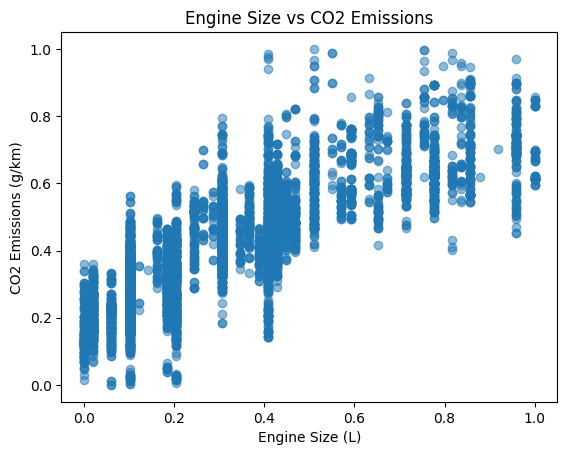

In [30]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], alpha=0.5)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.show()


ploting vehicle class vs CO2 Emission

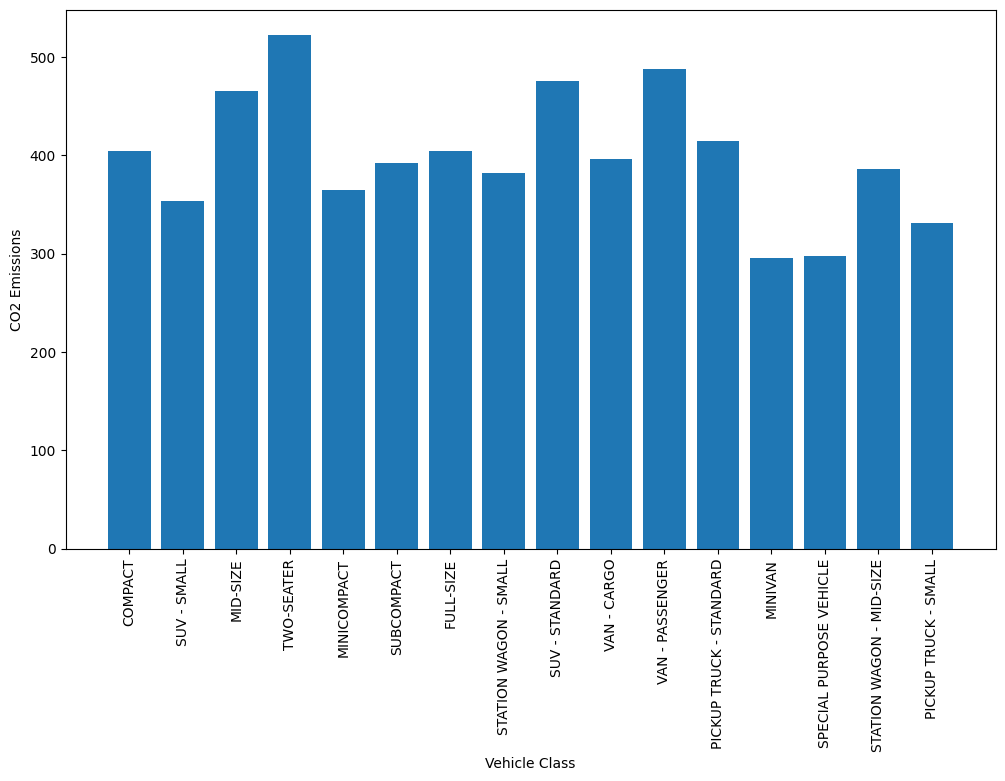

In [5]:
%matplotlib inline
vehicle_classes = df['Vehicle Class'].unique()
vehicle_classes_count =range(len(vehicle_classes))

plt.figure(figsize=(12,7))

plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')

plt.bar(df['Vehicle Class'] , df['CO2 Emissions(g/km)'] )
plt.xticks(vehicle_classes_count ,vehicle_classes, rotation = 'vertical')
plt.show()


Make vs CO2 Emission

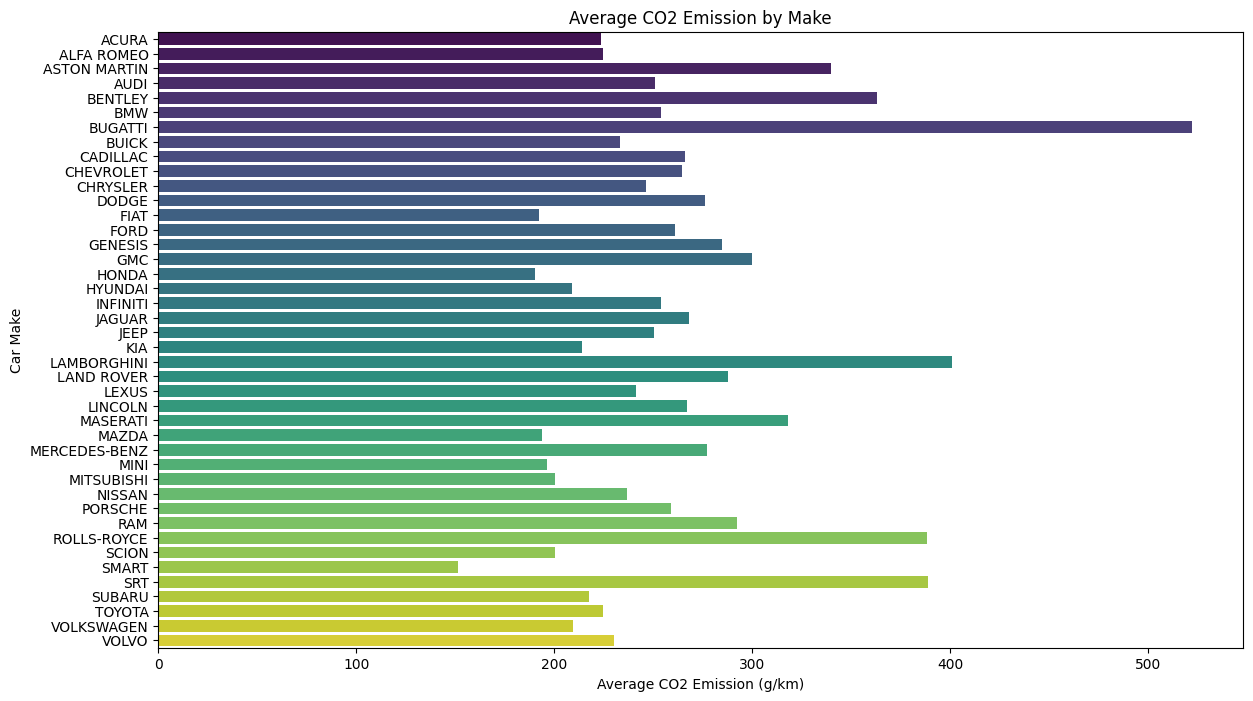

In [73]:
average_co2_by_make = df.groupby('Make')['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='CO2 Emissions(g/km)', y='Make', data=average_co2_by_make, palette='viridis')
plt.title('Average CO2 Emission by Make')
plt.xlabel('Average CO2 Emission (g/km)')
plt.ylabel('Car Make')
plt.show()

Data preprocessing

In [35]:
columns_to_drop = ['Model','Make','Fuel Consumption City (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Consumption Hwy (L/100 km)']

In [36]:
df.drop(labels=columns_to_drop,axis=1,inplace=True)

In [37]:
df

Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  \
0            COMPACT             2.0          4          AS5         Z   
1            COMPACT             2.4          4           M6         Z   
2            COMPACT             1.5          4          AV7         Z   
3        SUV - SMALL             3.5          6          AS6         Z   
4        SUV - SMALL             3.5          6          AS6         Z   
...              ...             ...        ...          ...       ...   
7380     SUV - SMALL             2.0          4          AS8         Z   
7381     SUV - SMALL             2.0          4          AS8         Z   
7382     SUV - SMALL             2.0          4          AS8         Z   
7383  SUV - STANDARD             2.0          4          AS8         Z   
7384  SUV - STANDARD             2.0          4          AS8         Z   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                                  8.5                  196  
1                                  9.6                  221  
2                                  5.9                  136  
3                                 11.1                  255  
4                                 10.6                  244  
...                                ...                  ...  
7380                               9.4                  219  
7381                               9.9                  232  
7382                              10.3                  240  
7383                               9.9                  232  
7384                              10.7                  248  

[7385 rows x 7 columns]

using quantile function to remove outliers

In [38]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create new DataFrames for numerical and categorical data
numerical_data = df[numerical_columns]

In [39]:
min_list = []
max_list = []
for  i in enumerate(numerical_data):
    mn , mx = numerical_data[i[1]].quantile([0.01,0.99])
    min_list.append(mn)
    max_list.append(mx)

In [40]:
for  i in enumerate(numerical_data):
    print(i[0])
    df =df[ df[i[1]] > min_list[i[0]] ]
    df =df[ df[i[1]] < max_list[i[0]] ]

0
1
2
3


In [41]:
print("the length after removing the outliers : " , len(df))

the length after removing the outliers :  6720


In [42]:
df

Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  \
0            COMPACT             2.0          4          AS5         Z   
1            COMPACT             2.4          4           M6         Z   
2            COMPACT             1.5          4          AV7         Z   
3        SUV - SMALL             3.5          6          AS6         Z   
4        SUV - SMALL             3.5          6          AS6         Z   
...              ...             ...        ...          ...       ...   
7380     SUV - SMALL             2.0          4          AS8         Z   
7381     SUV - SMALL             2.0          4          AS8         Z   
7382     SUV - SMALL             2.0          4          AS8         Z   
7383  SUV - STANDARD             2.0          4          AS8         Z   
7384  SUV - STANDARD             2.0          4          AS8         Z   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                                  8.5                  196  
1                                  9.6                  221  
2                                  5.9                  136  
3                                 11.1                  255  
4                                 10.6                  244  
...                                ...                  ...  
7380                               9.4                  219  
7381                               9.9                  232  
7382                              10.3                  240  
7383                               9.9                  232  
7384                              10.7                  248  

[6720 rows x 7 columns]

dealing with the catigorical

In [43]:
# List of categorical columns to one-hot encode
categorical_columns = ['Vehicle Class', 'Transmission', 'Fuel Type']

# Use get_dummies on all categorical columns at once
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True)


In [44]:
# Replace True and False with 1 and 0
df = df.replace({True: 1, False: 0})

In [15]:
df

Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0                2.0          4                               8.5   
1                2.4          4                               9.6   
2                1.5          4                               5.9   
3                3.5          6                              11.1   
4                3.5          6                              10.6   
...              ...        ...                               ...   
7380             2.0          4                               9.4   
7381             2.0          4                               9.9   
7382             2.0          4                              10.3   
7383             2.0          4                               9.9   
7384             2.0          4                              10.7   

      CO2 Emissions(g/km)  Vehicle Class_FULL-SIZE  Vehicle Class_MID-SIZE  \
0                     196                        0                       0   
1                     221                        0                       0   
2                     136                        0                       0   
3                     255                        0                       0   
4                     244                        0                       0   
...                   ...                      ...                     ...   
7380                  219                        0                       0   
7381                  232                        0                       0   
7382                  240                        0                       0   
7383                  232                        0                       0   
7384                  248                        0                       0   

      Vehicle Class_MINICOMPACT  Vehicle Class_MINIVAN  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
7380                          0                      0   
7381                          0                      0   
7382                          0                      0   
7383                          0                      0   
7384                          0                      0   

      Vehicle Class_PICKUP TRUCK - SMALL  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
7380                                   0   
7381                                   0   
7382                                   0   
7383                                   0   
7384                                   0   

      Vehicle Class_PICKUP TRUCK - STANDARD  ...  Transmission_AV6  \
0                                         0  ...                 0   
1                                         0  ...                 0   
2                                         0  ...                 0   
3                                         0  ...                 0   
4                                         0  ...                 0   
...                                     ...  ...               ...   
7380                                      0  ...                 0   
7381                                      0  ...                 0   
7382                                      0  ...                 0   
7383                                      0  ...                 0   
7384                                      0  ...                 0   

      Transmission_AV7  Transmission_AV8  Transmission_M5  Transmission_M6  \
0                    0                 0                0                0   
1                

normalizing

In [45]:
import sklearn.preprocessing as skp
mms = skp.MinMaxScaler()

In [46]:
for  i in enumerate(numerical_data):
    df[i[1]] = mms.fit_transform(df[[i[1]]])


spliting the data to train and test

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df["CO2 Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

Linear regression

In [48]:
#accuracy with default hyperparameter
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

linear_reg.fit(x_train, y_train)


LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred_linear = linear_reg.predict(x_test)
print(f"Mean Squared Error:{mean_squared_error(y_test, y_pred_linear)}")
print(f"Mean Absolute Error:{mean_absolute_error(y_test, y_pred_linear)}")
print(f"R-Squared Score:{r2_score(y_test, y_pred_linear)*100}%")

Mean Squared Error:0.00022827852243677196
Mean Absolute Error:0.009728572227223046
R-Squared Score:99.32273888524222%


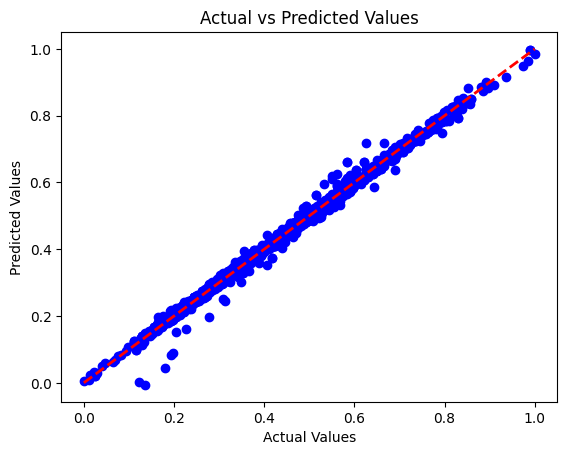

In [28]:

plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Ridge for regularization

In [68]:
from sklearn.linear_model import Ridge
# Ridge regression model with a specific regularization strength (alpha) to prevent overfitting
ridge_model = Ridge(alpha=0.02)

ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00022837047629662794


In [67]:
ridge_model.score(x_test, y_test)

0.9932260840442195

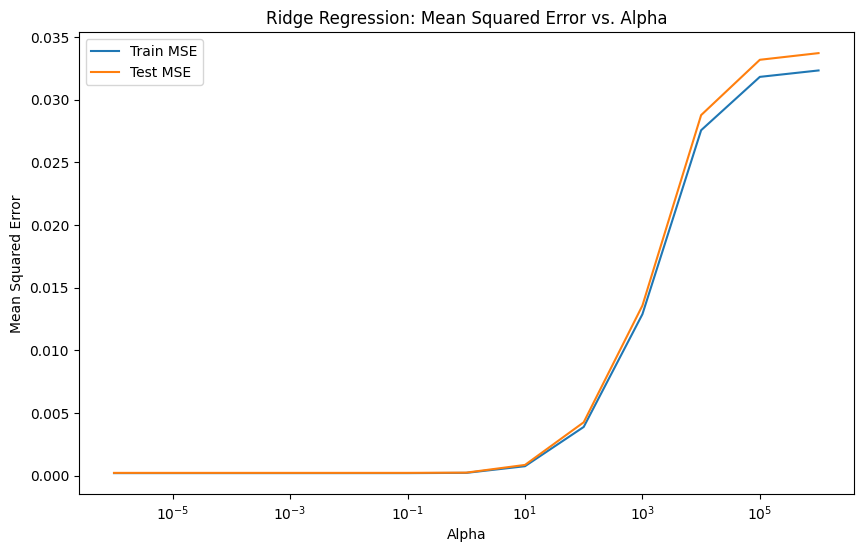

In [69]:
# range of alpha hyperparameter
alphas = np.logspace(-6, 6, 13)

train_errors = []
test_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)

    # Calculate MSE on the training set
    y_train_pred = ridge_model.predict(x_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Calculate MSE on the test set
    y_test_pred = ridge_model.predict(x_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_errors, label='Train MSE')
plt.semilogx(alphas, test_errors, label='Test MSE')
plt.title('Ridge Regression: Mean Squared Error vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

KNeighborsRegressor

In [21]:
#accuracy with default hyperparameter
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9422571823408523

In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

# grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)


{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [23]:
# new KNeighborsRegressor with the best hyperparameters
best_knn = KNeighborsRegressor(**best_params)

# Train the model with the training data
best_knn.fit(x_train, y_train)


KNeighborsRegressor(leaf_size=10, n_neighbors=3, p=1, weights='distance')

In [24]:
y_pred = best_knn.predict(x_test)
print(f"Accuracy:{grid_search.best_score_*100}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred)}")

Accuracy:97.59188589981756
Mean Squared Error:0.0007527469855312105


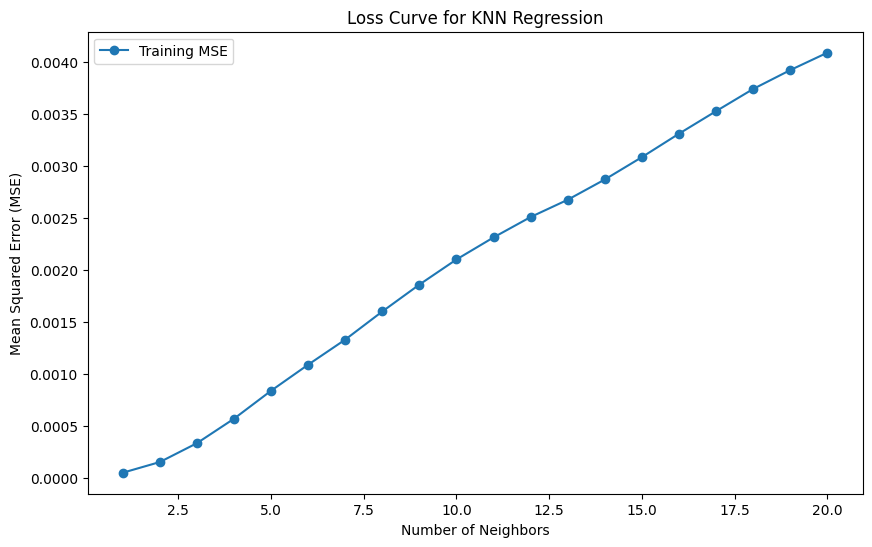

In [25]:
neighbors = np.arange(1, 21)
train_mse = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predictions on training and validation sets
    y_train_pred = knn.predict(x_train)

    # Calculate MSE for training and validation sets
    train_mse.append(mean_squared_error(y_train, y_train_pred))

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_mse, label='Training MSE', marker='o')
plt.title('Loss Curve for KNN Regression')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

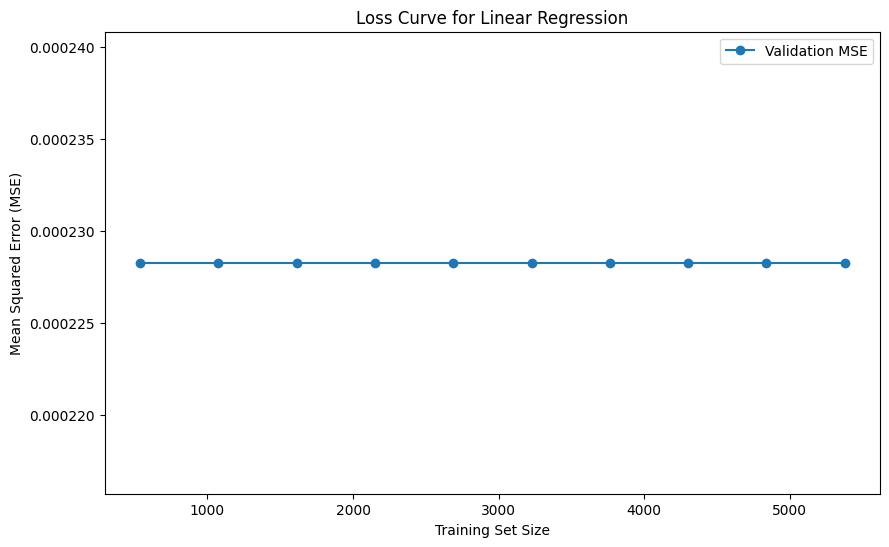

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10, endpoint=True)
test_mse = []

for size in train_sizes:

    # Train a linear regression model on the subset
    linear_reg = LinearRegression()
    linear_reg.fit(x_train, y_train)

    y_pred = linear_reg.predict(x_test)

    test_mse.append(mean_squared_error(y_test, y_pred))

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(x_train), test_mse, label='Test MSE', marker='o')
plt.title('Loss Curve for Linear Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

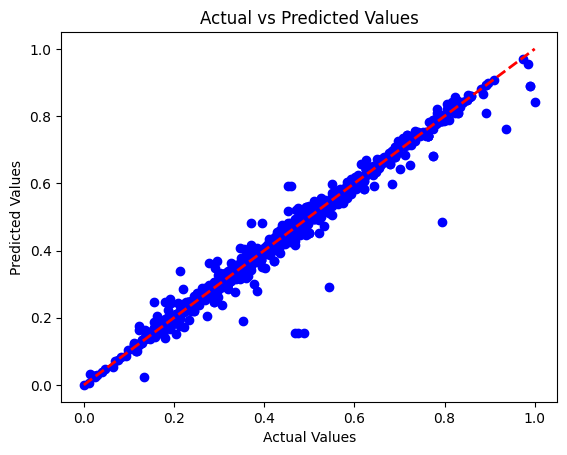

In [29]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
